# **Deep Learning on KMNIST (Kuzushiji-MNIST) Dataset** <br>
- *CM3015 Machine Learning and Neural Networks* <br>
- *End-term Coursework Report*

## **Abstract**

Machine Learning, deep learning and neural networks are subsets of artificial intelligence (AI) technology, and are tools used to solve complex problems. They usually require huge datasets to train an algorithm which can help automate tasks and conduct analysis without much human intervention. These technologies are also seeing a huge increase in interest and popularity among the general public.

**Machine Learning** primarily focuses on the use of statistics and large datasets to develop models and algorithms to enable computers to learn and improve from prior experiences during training. This process of learning helps to solve problems without being explicitly instructed.

**Deep Learning** is a subset of machine learning that utilizes artificial neural networks to model and solve problems. Deep learning algorithms attempt to mimic the human brain via the use of neural networks, and through several iterations (aka. epochs), the network can learn to recognize patterns or extract key features in the data to make future predictions.

**Neural Networks** are a computational model that was inspired by neurobiology, more specifically the human brain. They consist of interconnected nodes (inspired by neurons) stacked in multiple layers to process the input data and have its results passed on to the next layer. Every node also have weights associated with it to control how and when the node will be activated, allowing for fine-tuning of the deep learning algorithm.

## **Introduction**

For this project, the dataset used to undergo deep learning is known as Kuzushiji-MNIST (or KMNIST) from TensorFlow datasets. This dataset is utilized because it has a large-enough dataset for training and testing, with a total of 70,000 grayscale images. This dataset is also a drop-in replacement for the MNIST dataset. [1]

KMNIST is a dataset consisting of Kuzushiji characters, which refers to ancient cursive Japanese characters or scripts in old Japanese texts and manuscripts. The cursive nature of the characters makes the deep learning and classification of the characters difficult, as there are multiple variations for every character. This means that the model to be developed for this classification problem have to be more robust than that of the MNIST dataset. With only 70,000 images, the dataset may not contain every Kuzushiji character and may reflect certain inaccuracies if comparing the results against a different Kuzushiji dataset.

### **Goal**

This project aims to use deep learning to classify and predict Kuzushiji characters with the use of Kuzushiji-MNIST (KMNIST) dataset. This is achieved by developing a sufficiently robust neural network model that can accurately classify Kuzushiji characters with high accuracy, f1-score and cohen's kappa score.

- Accuracy represents the number of correct classifications over the total number of classification attempts, and the goal is to achieve **>80%** accuracy.
- F1-Score indicates the overall performance of the classification model and can reflect on how it can correctly identify positive cases while minimizing false positives and negatives. The goal is to achieve **>80%** f1-score.
- Cohen's Kappa Score indicates the classification model's accuracy, and the goal is to achieve **>80%** score.

## **Background**

### **What is Kuzushiji**

Kuzushiji refers to ancient cursive Japanese characters or scripts in old Japanese texts and manuscripts. Kuzushiji is known for its highly cursive and elaborate characters, and was the predominant writing style for Japanese before the modernization of the language and the adoption of standardized characters known as Kanji, Hiragana, and Katakana.

Kuzushiji was practiced over a thousand years prior to the modernization of the language, and as a result has a huge amount of untapped knowledge from the past. The use of modern Japanese language has led to Kuzushiji being forgotten. Old texts and manuscripts written in Kuzushiji are becoming increasingly difficult to understand, leading to a loss of important knowledge.

However, there has been an growing interest in Kuzushiji as a subject of study and research by many scholars in hopes of better understanding old Japanese history, literature, culture, etc. The preservation and digitization of Kuzushiji texts is becoming more common, such as the KMNIST dataset.

### **Kuzushiji and Modern Japanese**

The Japanese language has underwent multiple evolutions over its history, each has its key features and links back to Kuzushiji. It is however, during the modern evolution after the Meiji Restoration period (1868-1889) where Kuzushiji was threatened to become extinct.

- **Old Japanese (8th to 11th century)**: The earliest known Japanese texts, such as the Kojiki and Nihon Shoki, were written in a form of Old Japanese. This period saw the use of Chinese characters (kanji) for writing, along with two phonetic scripts, hiragana and katakana, which developed from kanji. Kuzushiji emerged as a cursive form of writing kanji, allowing for faster writing and more expressive characters.

- **Middle Japanese (12th to 16th century)**: During the medieval period, known as the late Middle Japanese period, the language underwent significant changes in pronunciation, grammar, and vocabulary. Kuzushiji became more prevalent in handwritten texts, especially in literature, poetry, and personal correspondence.

- **Early Modern Japanese (17th to 19th century)**: The early modern period saw the widespread use of Kuzushiji in official documents, literature, and personal letters. Despite efforts to standardize the language and writing system, Kuzushiji remained in use alongside standard kanji.

- **Modern Japanese (Late 19th century to present)**: In the late 19th century, the Meiji Restoration brought about significant changes to the Japanese language. The government promoted the adoption of a standardized form of Japanese based on Tokyo dialect and simplified the writing system. Kuzushiji gradually fell out of use in official documents and publications, replaced by modern printed fonts.

With the history of the Japanese language laid out in a simplified timeline, it tells us that modern Japanese is only used from the late 19th century. However, this change is leading to a potential loss of knowledge and old literature as few people can read and understand Kuzushiji.

## **Methodology**

### **Approach**

- Conduct data split on the dataset.
- Reshape & tranform the data to prepare for deep learning models.
- Develop underfitting and overfitting models.
- Develop regularized models on either of the previous models.
- Use appropriate regularized model on entire dataset, and evalute the results.

### **Installing Packages & Libraries**

In [1]:
pip install extra_keras_datasets

In [2]:
# Import libraries and packages to conduct deep learning
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

from keras import models, layers, regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from extra_keras_datasets import kmnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, cohen_kappa_score

import warnings
warnings.filterwarnings('ignore')

### **Data Preprocessing**

Before developing a model and evaluating its performance against a baseline, the dataset needs to be prepared to be acceptable for the model. There are multiple steps to prepare the data and are stated below:

1. Acquire the dataset and split the data into train:validate:test splits (3:1:1)
2. Normalize image pixels from [0, 255] to [0, 1]
3. Reshape/flatten the data from 2D array to 1D vector
3. One-Hot Encoding, to convert each label into a 10 element vector with a non-zero value

In [3]:
DATASET = 'kmnist'
DATASET_SIZE = 70000
TRAIN_SIZE = 0.6
VALIDATION_SIZE = 0.2
TEST_SIZE = 0.2

In [4]:
ds = tfds.load(DATASET, split='all', shuffle_files=True)

(x_train, y_train), (x_test, y_test) = kmnist.load_data(type='kmnist')
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_SIZE), shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=TEST_SIZE/(TEST_SIZE+VALIDATION_SIZE), shuffle=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteOKFN91/kmnist-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteOKFN91/kmnist-test.tfrecord*...:   0%|          | 0…

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.
5304/5304 [==============================] - 0s 0us/step


In [5]:
# Normalise pixels from [0, 255] to [0, 1], and convert to floats
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

In [6]:
# Figure out the split of the dataset between 'image' and 'labels', as well as training, validation, and testing sets.
print("train_image: ", X_train.shape)
print("train_labels: ", y_train.shape)
print("val_image: ", X_val.shape)
print("val_labels: ", y_val.shape)
print("test_image: ", X_test.shape)
print("test_labels: ", y_test.shape)

train_image:  (42000, 28, 28)
train_labels:  (42000,)
val_image:  (14000, 28, 28)
val_labels:  (14000,)
test_image:  (14000, 28, 28)
test_labels:  (14000,)


In [7]:
# Reshape the data to be acceptable for the deep learning model (from 2D array to 1D vector)

# Reshape 2D array to 1D vector
X_train = X_train.reshape(42000, 28*28)
X_test = X_test.reshape(14000, 28*28)
X_val = X_val.reshape(14000, 28*28)

In [8]:
# Conduct One-Hot Encoding with the "to_catergorical" function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [9]:
# Check the split of the dataset between 'image' and 'labels', as well as training, validation, and testing sets.
print("kmnist_train_img", X_train.shape)
print("kmnist_train_labels", y_train.shape)
print("kmnist_test_img", X_test.shape)
print("kmnist_test_labels", y_test.shape)
print("kmnist_val_img", X_val.shape)
print("kmnist_val_img", y_val.shape)

kmnist_train_img (42000, 784)
kmnist_train_labels (42000, 10)
kmnist_test_img (14000, 784)
kmnist_test_labels (14000, 10)
kmnist_val_img (14000, 784)
kmnist_val_img (14000, 10)


## **Evaluation Metrics**

To evaluate the performance of the models, the accuracy and loss metrics need to be determined to better understand the model. These 2 metrics help determine the fitting of the model, allowing us to better understand if the model is underfitted, overfitted, or is a good fit.

2 separate functions are to plot training and validation accuracy of the model, and to plot training and validation loss of the model. Creating graphs will help us visualize the accuracy/loss across the number of epochs (iterations). These 2 functions are also created separately to help with modularity of the code.

To evaluate each model, the accuracy would be used to determine how well the model performs. Additionally, other metrics such as the f1-scores Cohen's Kappa score can be used.

F1 score indicates the overall performance of a binary classification model. Cohen's Kappa score represents the classification model's accuracy. Both metrics are particularly useful as the deep learning model is a classification model, and reflects its performance.

### **Training and Validation Accuracy**

**Training and Validation Accuracy** is the key metric in indicating how well the model is correctly classifying the samples. This is what we would use to determine how well the model is doing, where the higher the accuracy the better. However, accuracy can get affected by the number of samples, and the splitting of the whole dataset into 3 (training, validation, testing) can affect the resulting accuracy value.

Training accuracy represents how well the model correctly classifies the samples during training, and validation accuracy indicates how well the model correctly classifies samples on new data.

In [10]:
# Creating a function to plot a training & validation Accuracy graph
def accuracy_plot(acc, val_acc):
  plt.clf()   #Remove any existing figures
  epochs = range(1, len(acc)+1) # get number of epochs

  # assign values for each axis
  plt.plot(epochs, acc, 'b.', label="Accuracy")
  plt.plot(epochs, val_acc, 'r.', label="Validation Accuracy")

  # Set title for graph and axes
  plt.title("Training Accuracy & Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid()
  plt.show()

### **Training and Validation Loss**

**Training and Validation Loss** is an important metric as it quantifies how far the model's prediction is from the correct classification. This is used in tandem with accuracy as it shows how the model's predictions are incorrect, and both metrics are 2 sides of the same coin.

Training loss represents how the model incorrectly classifies the samples during training, and validation loss indicates how the model incorrectly classifies samples on new data.

In [11]:
# Creating a function to plot a training & validation loss graph
def loss_plot(loss, val_loss):
  plt.clf()   # Remove any existing figures
  epochs = range(1, len(loss)+1)  # get number of epochs

  # Assign values for each axis
  plt.plot(epochs, loss, 'b.', label="Training Loss")
  plt.plot(epochs, val_loss, 'r.', label="Validation Loss")

  # Set title for graph and axes
  plt.title("Training Loss & Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid()
  plt.show()

### **Optimizer**

As the goal of the deep learning model is to maximize accuracy and minimize loss, optimizer can be utilized. Optimizers are functions/algorithms that help adjusts the attributes of a neural network such as the weights and learning rates. This helps reduce overall loss of the model and increasing overall accuracy.

There are many types of optimizers commonly used for neural network models, with the most common ones being Stochastic Gradient Descent (SGD) algorithms and Root Mean Squared Propagation (RMSprop) algorithms.

The Adaptive Moment Estimation or "Adam" optimizer can be viewed as a variant and combination of SGD algorithm and RMSprop algorithm. Adam is a well-known optimizer and works well in training deep learning models. Therefore, Adam will be used for this project to help lower overall loss and increase accuracy for the model.

### **Naive Baseline**

After looking at the KMNIST dataset, there are a total of 10 labels and each label represents each of the 10 rows of Japanese characters. Hence, the naive baseline would be 100% divided by the 10 labels, which would be **10%**. The models to be developed should do better than the naive baseline.

## **Develop Models using hold-out validation**

To develop models for this project, hold-out validation would be followed. Hold-out validation works by splitting the dataset into 'train' and 'test' sets, where the model is developed using the training set and then its performance will be evaluated using the test set.

### **Underfitted Model**

Underfitting is the process of oversimplifying the data used when training the model. This is useful as it does not fully take all environmental aspects when training, which results in quicker training of the model. The purpose is to have a rough sensing of how the model is performing as the model would produce oversimplified results.

In [12]:
# Create empty network
underfit_model = models.Sequential(name='Underfit')

# Add layers
underfit_model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Compile network & assign optimizer, loss and metrics
underfit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Fit training data to the network
underfit_results = underfit_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=0)

In [15]:
# Display network summary
underfit_model.summary()

Model: "Underfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


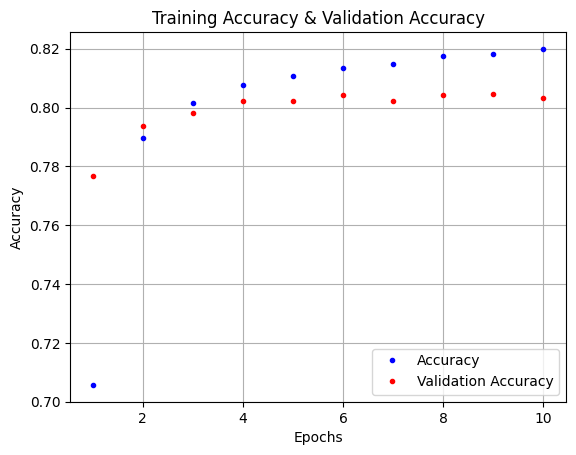

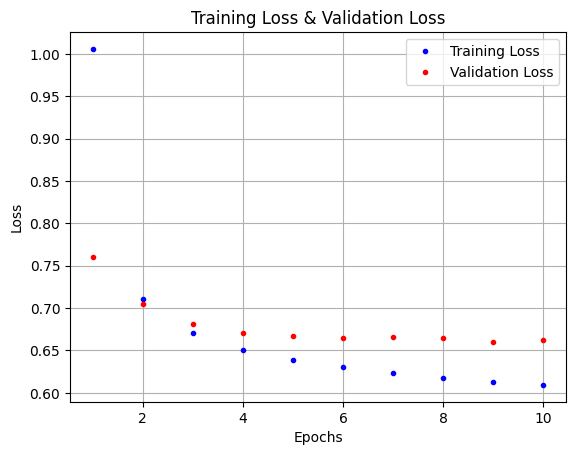

In [16]:
# Plot training & validation accuracy of model
accuracy_plot(underfit_results.history['accuracy'], underfit_results.history['val_accuracy'])

# Plot training & validation loss of model
loss_plot(underfit_results.history['loss'], underfit_results.history['val_loss'])

In [17]:
# Evaluate the model's loss & accuracy
test_loss, test_acc = underfit_model.evaluate(X_val, y_val)

438/438 [==============================] - 1s 1ms/step - loss: 0.6623 - accuracy: 0.7998


Both the training & validation accuracy and the training & validation loss seen in the plots above shows a similar curve. As expected with an underfitted model. The underfitted model's results above also shows about **80% accuracy** and about **65% loss**, this result shows how well it does despite being underfitted. This does much better than the 10% naive baseline.

### **Overfitted Model**

Overfitting is the process of overtraining the model with too much complex data. The model becomes overly-accustomed to the training data and fits the training data too well. The results of fitting the training data too well would result in it being less useful for new datasets. However, this is useful in determining where a well-fitted model will be by comparing it with the underfitted model.

In [18]:
# Create empty network
overfit_model = models.Sequential(name="Overfit")

# Add layers
overfit_model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
overfit_model.add(layers.Dense(124, activation='relu'))
overfit_model.add(layers.Dense(46, activation='relu'))
overfit_model.add(layers.Dense(10, activation='softmax'))

In [19]:
# Compile network & assign optimizer, loss and metrics
overfit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Fit training data to the network
overfit_results = overfit_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)

In [21]:
# Display network summary
overfit_model.summary()

Model: "Overfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 124)               63612     
                                                                 
 dense_3 (Dense)             (None, 46)                5750      
                                                                 
 dense_4 (Dense)             (None, 10)                470       
                                                                 
Total params: 471752 (1.80 MB)
Trainable params: 471752 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


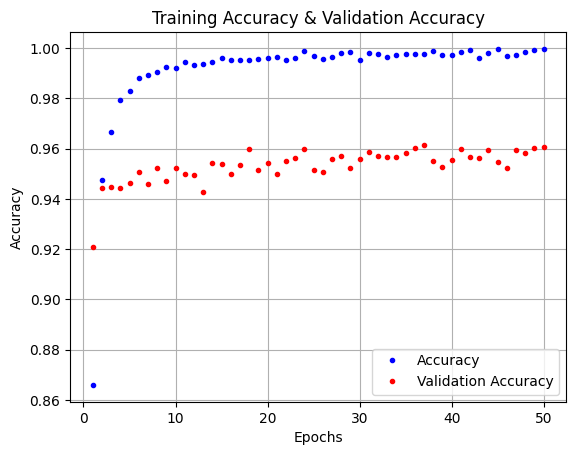

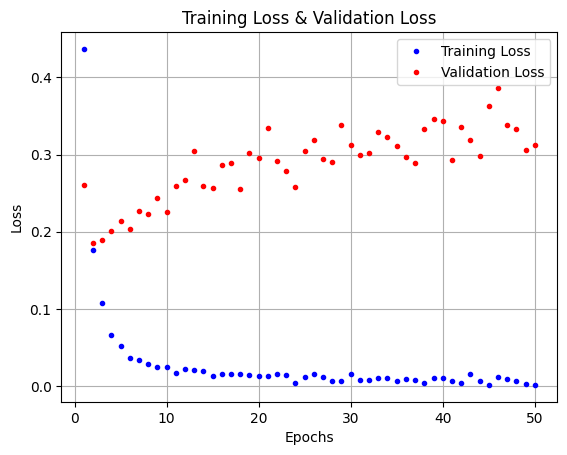

In [22]:
# Plot training & validation accuracy of model
accuracy_plot(overfit_results.history['accuracy'], overfit_results.history['val_accuracy'])

# Plot training & validation loss of model
loss_plot(overfit_results.history['loss'], overfit_results.history['val_loss'])

In [23]:
# Evaluate the model's loss & accuracy
test_loss, test_acc = overfit_model.evaluate(X_val, y_val)

438/438 [==============================] - 2s 4ms/step - loss: 0.3052 - accuracy: 0.9604


For the training & validation accuracy plot, it shows a disparity between the accuracy results. This is also reflected in the training & validation loss plot above, where the validation loss is higher than that of training loss. This is expected as the model is overfitted, where the training data will do very well but not so well for new data. The overfitted model's results above also shows about **95% accuracy** and a range of **30-35% loss**. This result is better than the 10% of the naive baseline, and it also does better against the underfitted model.

## **Regularizing the Model**

With both underfitted and overfitted models developed, regularization can be done on both models to develop a well-fitted model. 2 different methods are used and its results evaluated to develop a better model that can perform better than the underfitted and overfitted models.

### **Dropout Regularization**

Dropout regularization works by disregarding or 'dropping' certain nodes in the neural network at random. The purpose is to help prevent overfitting of the model.

In [24]:
# Create empty network
dropout_model = models.Sequential(name="DropOut")

# Add layers
dropout_model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# Add dropout layers
dropout_model.add(layers.Dropout(0.7))
dropout_model.add(layers.Dense(124, activation='relu'))
dropout_model.add(layers.Dense(46, activation='relu'))
dropout_model.add(layers.Dropout(0.7))
dropout_model.add(layers.Dense(10, activation='softmax'))

In [25]:
# Compile network & assign optimizer, loss and metrics
dropout_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Fit training data to the network
dropout_result = dropout_model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test), verbose=0)

In [27]:
dropout_model.summary()

Model: "DropOut"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 124)               63612     
                                                                 
 dense_7 (Dense)             (None, 46)                5750      
                                                                 
 dropout_1 (Dropout)         (None, 46)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                470       
                                                                 
Total params: 471752 (1.80 MB)
Trainable params: 471752 (1.

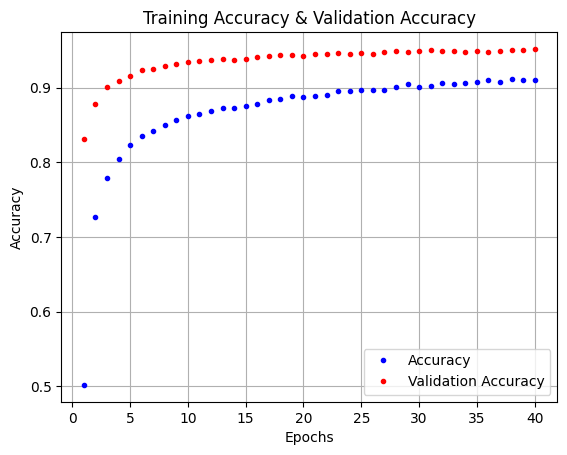

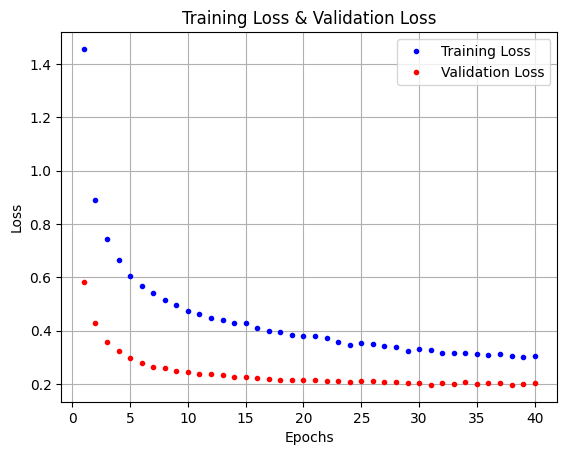

In [28]:
# Plot training & validation accuracy of model
accuracy_plot(dropout_result.history['accuracy'], dropout_result.history['val_accuracy'])

# Plot training & validation loss of model
loss_plot(dropout_result.history['loss'], dropout_result.history['val_loss'])

In [29]:
# Evaluate the model's loss & accuracy
test_loss, test_acc = dropout_model.evaluate(X_val, y_val)

438/438 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9503


Both training & validation accuracy and loss plots show a slight disparity between its results. Surprisingly, the dropout model is performing better with unseen data (validation data) as compared to the larger training dataset. The result shows about **95% accuracy** and about a **20% loss**, which are better than both the underfitted and overfitted models. However, more can be done to develop a model that can improve or maintain the accuracy while reducing the loss.

### **L1 and L2 Regularization**

L1 and L2 regularization are techniques that add penalty term to the loss function of the neural network. This penalty term lowers the nodes' coefficient (similar to dropout) and helps prevent overfitting. L1 regularization is known as 'Lasso Regression', where its penalty term is an absolute value of magnitude. While L2 regularization is known as 'Ridge Regression', where its penalty term is a squared magnitude. Both L1 and L2 regularizations will be used in this model.

In [30]:
# Create empty network
l1l2_model = models.Sequential(name="L1/L2")

# Add layers
l1l2_model.add(layers.Dense(512, activation ='relu', input_shape=(28*28,)))
l1l2_model.add(layers.Dense(124, kernel_regularizer=regularizers.l1(0.01), input_shape=(10000,), activation='relu'))
l1l2_model.add(layers.Dense(46, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
l1l2_model.add(layers.Dense(10, activation='softmax'))

In [31]:
# Compile network & assign optimizer, loss and metrics
l1l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Fit training data to the network
l1l2_result = l1l2_model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test), verbose=0)

In [33]:
l1l2_model.summary()

Model: "L1/L2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 124)               63612     
                                                                 
 dense_11 (Dense)            (None, 46)                5750      
                                                                 
 dense_12 (Dense)            (None, 10)                470       
                                                                 
Total params: 471752 (1.80 MB)
Trainable params: 471752 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


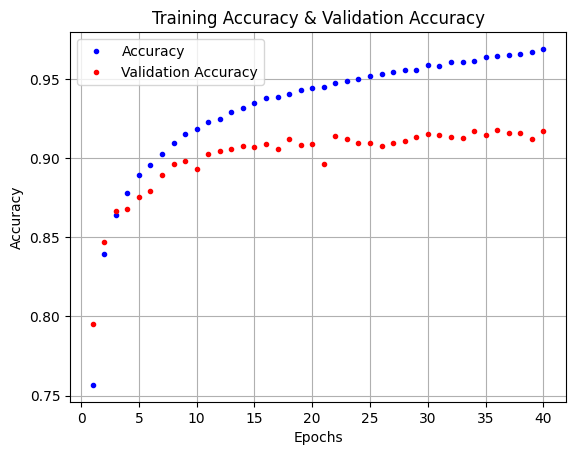

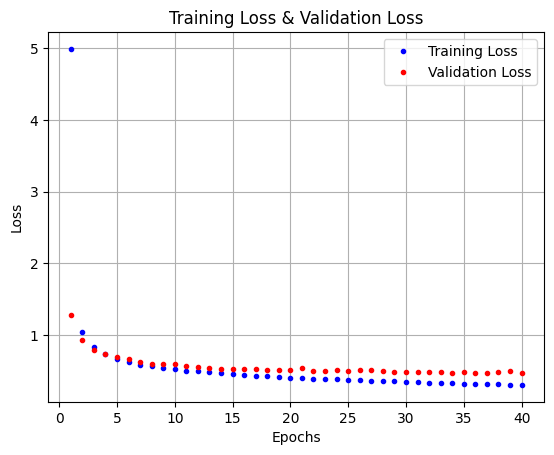

In [34]:
# Plot training & validation accuracy of model
accuracy_plot(l1l2_result.history['accuracy'], l1l2_result.history['val_accuracy'])

# Plot training & validation loss of model
loss_plot(l1l2_result.history['loss'], l1l2_result.history['val_loss'])

In [35]:
# Evaluate the model's loss & accuracy
test_loss, test_acc = l1l2_model.evaluate(X_val, y_val)

438/438 [==============================] - 2s 4ms/step - loss: 0.4734 - accuracy: 0.9201


Training & validation loss plot shows little disparity between both types of loss. However, the training & validation accuracy plot shows a significant difference between them. This model performs poorer with unseen data for both accuracy and loss, and the result shows about **90% accuracy** and about a **45% loss**. This result shows poorer performance as compared to the dropout model and even the overfitted model.

### **Combined Regularization Model**

As each of the regularization methods have its own strengths, a model that uses both dropout and L1/L2 regularization can perform better than either of the methods.

In [36]:
# Create empty network
dropout_l1l2_model = models.Sequential(name="DropOut-L1/L2")

# Add layers
dropout_l1l2_model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
dropout_l1l2_model.add(layers.Dropout(0.7))
dropout_l1l2_model.add(layers.Dense(124, kernel_regularizer=regularizers.l1(0.001), input_shape=(10000,), activation = 'relu'))
dropout_l1l2_model.add(layers.Dense(46, activation='relu'))
dropout_l1l2_model.add(layers.Dense(10, activation='softmax'))

In [37]:
# Compile network & assign optimizer, loss and metrics
dropout_l1l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Fit training data to the network
dropout_l1l2_result = dropout_l1l2_model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test), verbose=0)

In [39]:
dropout_l1l2_model.summary()

Model: "DropOut-L1/L2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 124)               63612     
                                                                 
 dense_15 (Dense)            (None, 46)                5750      
                                                                 
 dense_16 (Dense)            (None, 10)                470       
                                                                 
Total params: 471752 (1.80 MB)
Trainable params: 471752 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


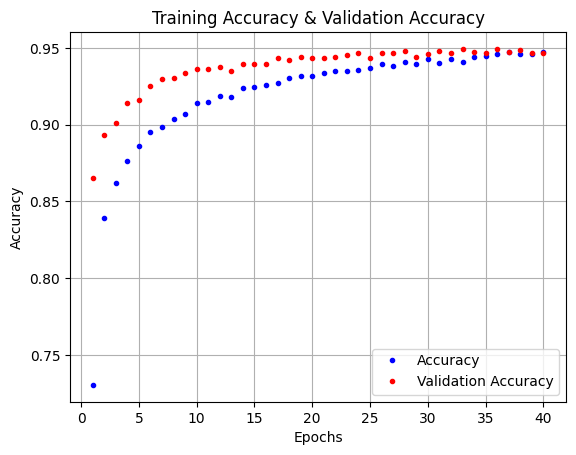

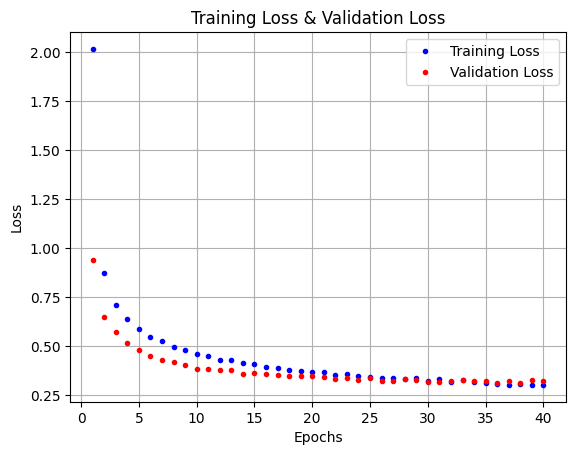

In [40]:
# Plot training & validation accuracy of model
accuracy_plot(dropout_l1l2_result.history['accuracy'], dropout_l1l2_result.history['val_accuracy'])

# Plot training & validation loss of model
loss_plot(dropout_l1l2_result.history['loss'], dropout_l1l2_result.history['val_loss'])

In [41]:
# Evaluate the model's loss & accuracy
test_loss, test_acc = dropout_l1l2_model.evaluate(X_val, y_val)

438/438 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.9467


Looking at the plots above, this model has a good fit and the model does better with validation data as compared to the training data. This model has a result of about **95% accuracy** with **30% loss**. While this result is slightly worse than the model just using dropout regularization, the closer graphs for both training and validation data shows a better fit and would produce a more consistent result.

## **Finalized Model**

Having developed a model appropriate for use with good fit (combined regularized model), training can be conducted on the entire dataset instead of the split dataset.

In [42]:
# Create empty network
final_model = models.Sequential(name="Final")

# Add layers
final_model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
final_model.add(layers.Dropout(0.7))
final_model.add(layers.Dense(124, kernel_regularizer=regularizers.l1(0.001), input_shape=(10000,), activation='relu'))
final_model.add(layers.Dense(46, activation='relu'))
final_model.add(layers.Dense(10, activation='softmax'))

In [43]:
# Compile network & assign optimizer, loss and metrics
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
final_model.summary()

Model: "Final"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 124)               63612     
                                                                 
 dense_19 (Dense)            (None, 46)                5750      
                                                                 
 dense_20 (Dense)            (None, 10)                470       
                                                                 
Total params: 471752 (1.80 MB)
Trainable params: 471752 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Concatenate training and validation datasets
final_fit = final_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

1750/1750 [==============================] - 15s 8ms/step - loss: 1.3537 - accuracy: 0.7773


In [46]:
test_loss, test_acc = final_model.evaluate(X_test, y_test)

438/438 [==============================] - 1s 3ms/step - loss: 0.6802 - accuracy: 0.8872


In [49]:
y_pred = final_model.predict(X_test)
Y_test = np.argmax(y_test, axis = 1)
Y_pred = np.argmax(y_pred, axis = 1)

# Statistical Metrics
precision_stat = precision_score(Y_test, Y_pred, average='micro')
recall_stat = recall_score(Y_test, Y_pred, average='micro')
f1_stat = f1_score(Y_test, Y_pred, average='micro')
ck_stat = cohen_kappa_score(Y_test, Y_pred)

# Print Statistical Scores
print("Precision: ", precision_stat)
print("Recall: ", recall_stat)
print("F1-score: ", f1_stat)
print("Cohen Kappa Score: ", ck_stat)

438/438 [==============================] - 2s 4ms/step
Precision:  0.8872142857142857
Recall:  0.8872142857142857
F1-score:  0.8872142857142857
Cohen Kappa Score:  0.8746750578403295


The final model has a result of about **88% accuracy** with **68% loss**. While this result shows good accuracy but also high loss, this is expected as the nature of the data is difficult to classify properly. However, looking at the statistical metrics calculated above, the finalized model performs well with a precision of 88%, recall of 88%, an f1-score of 88%, and cohen's kappa score of 87%.



## **Results and Evaluation**

To summarize the findings when developing the appropriate model, I have collated them below. It is important to note that solely using accuracy and loss as the primary metric can miss out on key details such as underfitting or overfitting of the model. The 'combined regularized model' performed the best without underfitting or overfitting.
>
1. Underfitted Model
  - Accuracy: 80%
  - Loss: 65%
2. Overfitted Model
  - Accuracy: 95%
  - Loss: 30-35%
3. Dropout Regularized Model
  - Accuracy: 95%
  - Loss: 20%
4. L1/L2 Regularized Model
  - Accuracy: 90%
  - Loss: 45%
5. Combined Regularized Model
  - Accuracy: 95%
  - Loss: 30%
6. Final Model
  - Accuracy: 88%
  - Loss: 68%

Finalized model is based on the 'combined regularized model' with the result of around 88% accuracy, f1-score, and cohen kappa's score. All these metrics have exceeded the goal stated above of having at least 80%. This means that the classification deep learning model developed for the KMNIST dataset meets the goals and does well in classifying the images.

It is also important to state that the loss for this model is high, and the development method for the final model may not be optimal. The high loss value could be caused by many different factors and is difficult to evaluate on its own. Further development along with use of other methods and models can bring a more comprehensive evaluation to this project.

## **Conclusion**

I have developed a model that performs well with the KMNIST dataset by utilizing the hold-out validation method. The model uses the overfitted model as the base before regularizing it with both dropout and L1 and L2 regularization. As mentioned in the results and evaluation section, the final model meets the goals and produces accurate results in classifying the KMNIST images correctly.

While the results of the final model shows it performing well with the KMNIST dataset, other methods and techniques can be employed and may perform better. Further developments and testing with other techniques such as cross-validation or k-folds iteration could produce better results than the hold-out validation method. The use of other techniques in during the regularization of the models could also produce better results.

## **References**

[1] TensorFlow datasets catalog: kmnist, https://www.tensorflow.org/datasets/catalog/kmnist [Last accessed: 06/03/2024]